In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('cereals.csv')

In [3]:
df.head(5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
len(df)

77

In [5]:
df.head(17)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813


In [4]:
len(df)*len(df.columns)

1232

In [5]:
manufacturer_dict = {
  'A': 'American Home Food Products;',
  'G': 'General Mills',
  'K': 'Kelloggs',
  'N': 'Nabisco',
  'P': 'Post',
  'Q': 'Quaker Oats',
  'R': 'Ralston Purina ',
}

In [8]:
df.rename(['mfr'],manufacturer_dict)

TypeError: DataFrame.rename() takes from 1 to 2 positional arguments but 3 were given

Changing for the type column, instead of C and H, we want to use the labels of the these variables as Hot and Cold in any visualizations

In [7]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [8]:
type_dict = {
    'C':'Cold',
    'H' : 'Hot'
}
    
    

Exploratory Data Analysis to understand the dataset and derive relationships from those data

We will begin with subplotting

In [9]:
default_subplot_adjustment = {
    
    'left':None,
    'bottom': None,
    'right': None,
    'top': None,
    'wspace':0.4,
    'hspace':0.4
    
}

In [10]:
def subplots_grid_visualizer(
  dataframe: pd.DataFrame,
  columns: list[str],
  visualizer: callable,
  n_cols: int = 5,
  subplot_col_width: float = 7.5,
  subplot_col_height: float = 5,
  color_palette = sns.color_palette('Paired'),
  subplots_adjustment: dict = default_subplot_adjustment,
  title: str = None,
  figsize: tuple[float, float] = None
) -> None:
  df_subplot = dataframe.copy(deep=True)
  # subplots grid configuration
  total_columns = len(columns)
  cols_to_display = n_cols
  rows_to_display = ceil(total_columns / cols_to_display)

  # subplots sizing
  if not figsize:
    figsize = (
      cols_to_display * subplot_col_width,
      rows_to_display * subplot_col_height
    )
# subplots initialization
  fig, axes = plt.subplots(rows_to_display, cols_to_display, figsize=figsize)
  if title:
    plt.suptitle(title, fontsize='xx-large')

  # set the spacing between subplots
  plt.subplots_adjust(**subplots_adjustment)

  # the actual plotting
  for index, col in enumerate(columns):
    ax = axes[
      int(index / cols_to_display),
      int(index % cols_to_display)
    ]
    visualizer(df_subplot, index, col, ax, color_palette)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [12]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
calories,77.0,106.883117,19.484119,50.000000,100.000000,110.000000,110.000000,160.000000
protein,77.0,2.545455,1.094790,1.000000,2.000000,3.000000,3.000000,6.000000
fat,77.0,1.012987,1.006473,0.000000,0.000000,1.000000,2.000000,5.000000
sodium,77.0,159.675325,83.832295,0.000000,130.000000,180.000000,210.000000,320.000000
fiber,77.0,2.151948,2.383364,0.000000,1.000000,2.000000,3.000000,14.000000
carbo,77.0,14.597403,4.278956,-1.000000,12.000000,14.000000,17.000000,23.000000
sugars,77.0,6.922078,4.444885,-1.000000,3.000000,7.000000,11.000000,15.000000
potass,77.0,96.077922,71.286813,-1.000000,40.000000,90.000000,120.000000,330.000000
vitamins,77.0,28.246753,22.342523,0.000000,25.000000,25.000000,25.000000,100.000000
shelf,77.0,2.207792,0.832524,1.000000,1.000000,2.000000,3.000000,3.000000


understanding the non numeric datatypes

In [14]:
df.select_dtypes(exclude=np.number).dtypes

name    object
mfr     object
type    object
dtype: object

now we work on seeing the distribution of the dataset

In [15]:
TARGET_VARIABLE = 'rating' #@param {type: 'string'}
# TARGET_VARIABLE = 'fiber' #@param {type: 'string'}

In [16]:
df['type'].unique()

array(['C', 'H'], dtype=object)

In [17]:
df['type'].count()

77

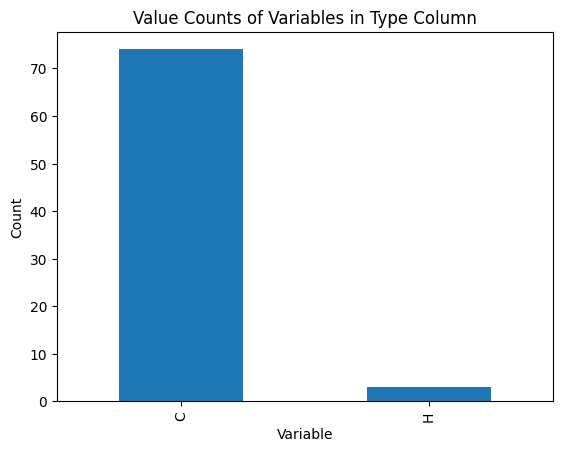

In [18]:
counts = df['type'].value_counts()
counts.plot(kind='bar')


plt.xlabel('Variable')
plt.ylabel('Count')
plt.title('Value Counts of Variables in Type Column')

plt.show()

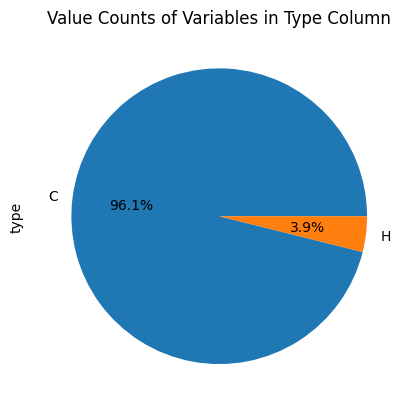

In [19]:
type_count = df['type'].value_counts()
type_count.plot.pie(
autopct='%1.1f%%',
)

plt.title('Value Counts of Variables in Type Column')

plt.show()

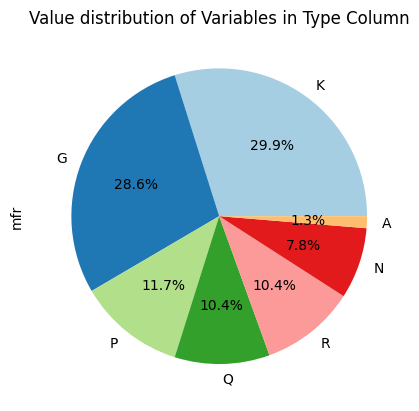

In [20]:
mfr_distribution= df['mfr'].value_counts()
mfr_distribution.plot.pie(
    autopct='%1.1f%%',
    colors=sns.color_palette('Paired'),
    fontsize=10
)
plt.title('Value distribution of Variables in Type Column')

plt.show()

In [10]:
len(df[df['mfr'] == 'A'])

1

Overall data with histograms to see the distribution of all the data

/Users/joelsabiti/pytorch-test/env/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


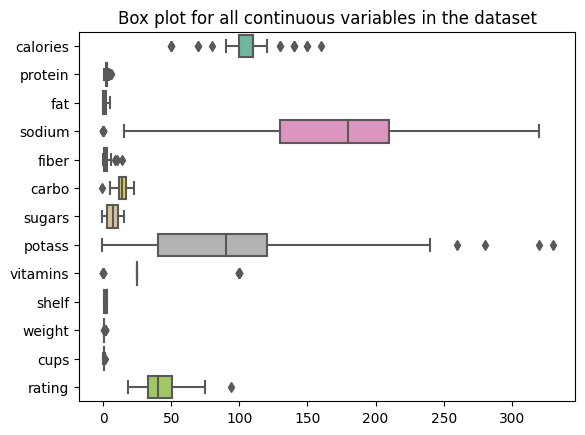

In [11]:
to_exclude = [
    'type',
    'mfr'
]
 
columns_to_plot = [col for col in df.columns if col not in to_exclude]

sns.boxplot(data=df[columns_to_plot], orient='h', palette='Set2')

plt.title('Box plot for all continuous variables in the dataset')

plt.show()




/var/folders/k2/kj7q9j0j0g3gwyst556zcjh40000gn/T/ipykernel_9966/532613626.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().abs(),


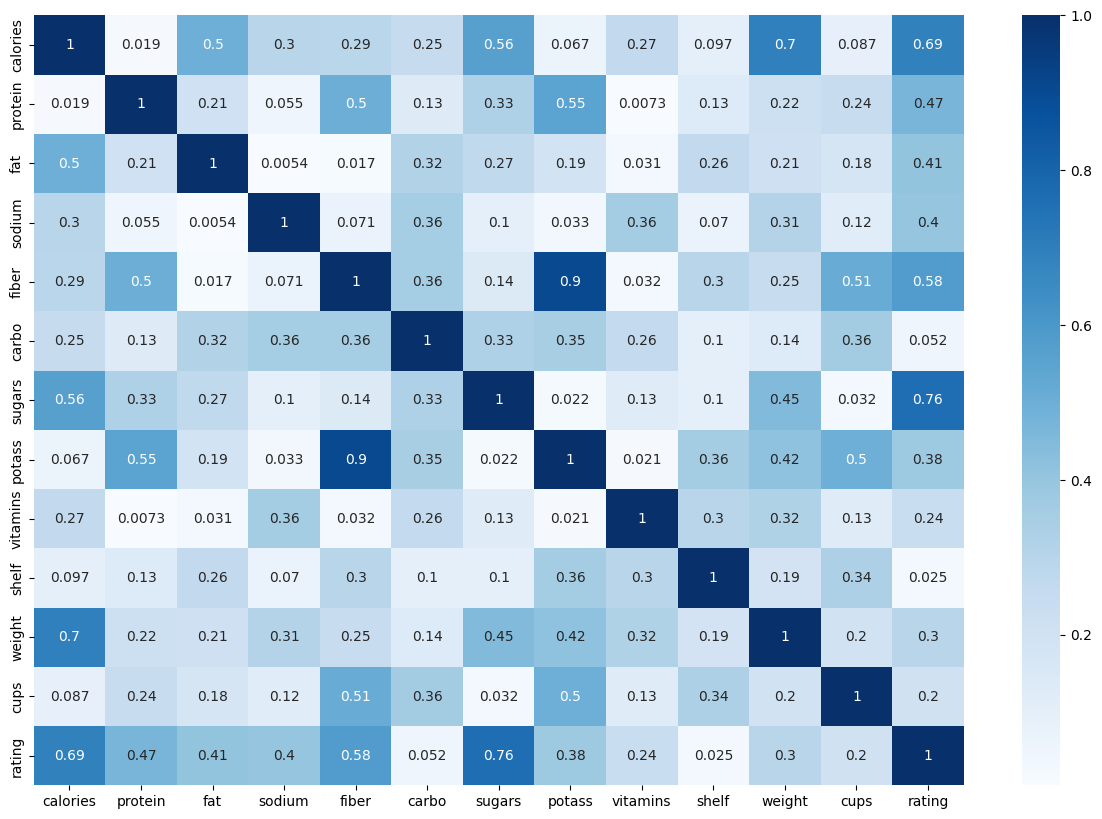

In [23]:
plt.figure(figsize=(15,10))
_ = sns.heatmap(
df.corr().abs(),
annot=True,
fmt='.2g',
cmap='Blues'
)

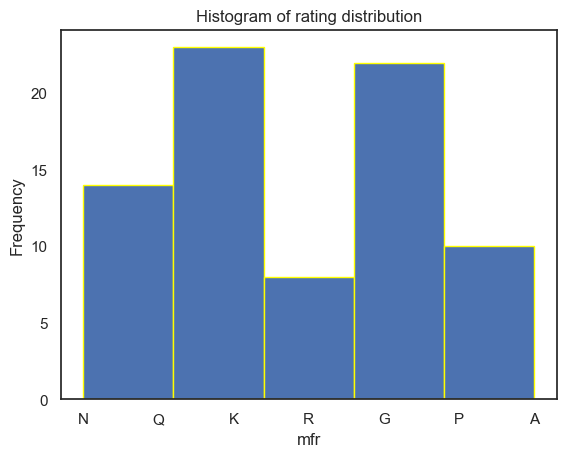

In [28]:
plt.hist(df['mfr'], bins=5, edgecolor='yellow')
plt.xlabel('mfr')
plt.ylabel('Frequency')
plt.title('Histogram of rating distribution')
plt.show()

In [25]:
correlation_columns = df.select_dtypes(include=np.number).columns
correlation_columns_to_ignore = [
    'name',
    TARGET_VARIABLE
]

correlation_columns_to_plot = [col for col in correlation_columns if col not in correlation_columns_to_ignore]
sns.set_theme(style='white')
def correlation_visualizer(df_subplot, index, col, ax, color_palette)-> None:
    temp_correlation_plot = sns.histplot(
    data=df_subplot,
    x=col,
    y=TARGET_VARIABLE,
    ax=ax,
    palette=color_palette,
    )
    
    subplots_grid_visualizer(
    Title = 'oVERALL CEREALS DATASET CORRELATION',
    dataframe = df,
    columns = correlation_columns_to_plot,
    n_cols=6, visualizer = correlation_visualizer,
    
    subplots_adjustment={
    'top': 0.9,
    'bottom': None,
    'wspace': 0.2,
    'hspace': 0.2,
  }
)
                               
                               

In [26]:
def subplots_grid_visualizer(
  dataframe: df,
  columns: list[str],
  visualizer: callable,
  n_cols: int = 5,
  subplot_col_width: float = 7.5,
  subplot_col_height: float = 5,
  color_palette = sns.color_palette('Paired'),
  subplots_adjustment: dict = default_subplot_adjustment,
  title: str = None,
  figsize: tuple[float, float] = None
) -> None:
  df_subplot = dataframe.copy(deep=True)
  # subplots grid configuration
  total_columns = len(columns)
  cols_to_display = n_cols
  rows_to_display = cell(total_columns / cols_to_display)

  # subplots sizing
  if not figsize:
    figsize = (
      cols_to_display * subplot_col_width,
      rows_to_display * subplot_col_height
    )

  # subplots initialization
  fig, axes = plt.subplots(rows_to_display, cols_to_display, figsize=figsize)
  if title:
    plt.suptitle(title, fontsize='xx-large')

  # set the spacing between subplots
  plt.subplots_adjust(**subplots_adjustment)

  # the actual plotting
  for index, col in enumerate(columns):
    ax = axes[
      int(index / cols_to_display),
      int(index % cols_to_display)
    ]
    visualizer(df_subplot, index, col, ax, color_palette)

In [91]:
columns_to_plot = [col for col in df.select_dtypes(include=np.number).columns if col not in [ TARGET_VARIABLE ] ]

sns.set_theme(style='white')
subplots_grid_visualizer(
  dataframe=df,
  columns=columns_to_plot,
  n_cols=4,
  visualizer=lambda df_subplot, index, col, ax, color_palette: (
    sns.histplot(data=df_subplot, ax=ax, x=col)
  ),
  subplot_col_width = 7.5,
  subplot_col_height = 5,
  subplots_adjustment={
    'wspace': 0.2,
    'hspace': 0.2,
  }
)

NameError: name 'cell' is not defined

In [ ]:
df.head(77)

In [29]:
sort_temp_df = df.copy()
sort_temp_df = sort_temp_df.sort_values(by=['rating'], ignore_index=True)

In [30]:
sns.set_theme(style="ticks")

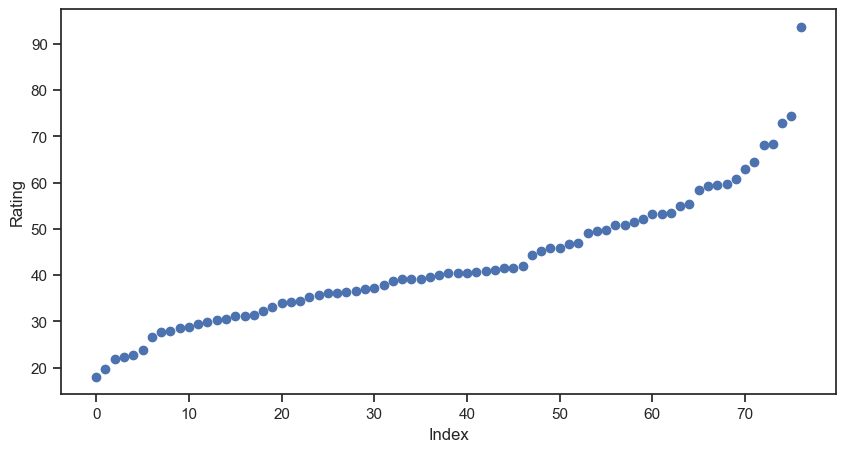

In [31]:
plt.figure(figsize=(10, 5))

plt.scatter(x=sort_temp_df.rating.index, y=sort_temp_df.rating)

_ = plt.xlabel('Index')
_ = plt.ylabel('Rating')

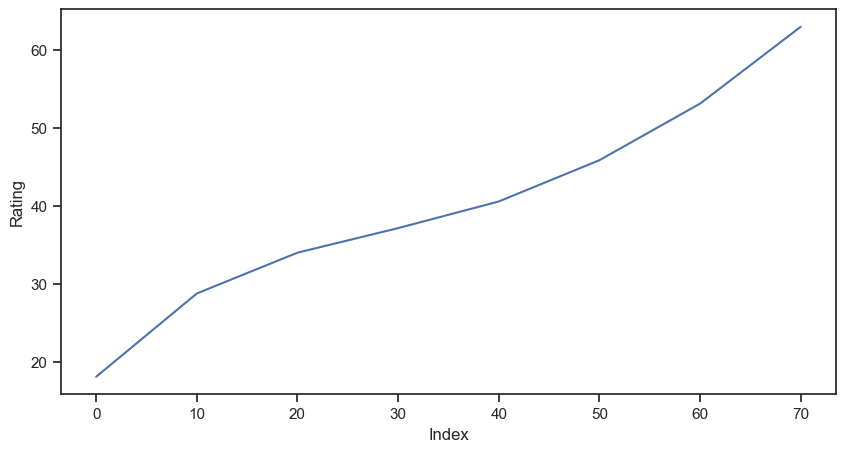

In [32]:
plt.figure(figsize=(10, 5))

# the less steps the more detailed
steps = 10
# steps = 2

# the stepped dataframe jumping by n intervals
stepped_sort_temp_df = sort_temp_df[::steps]
plt.plot(stepped_sort_temp_df.rating.index, stepped_sort_temp_df.rating)

_ = plt.xlabel('Index')
_ = plt.ylabel('Rating')

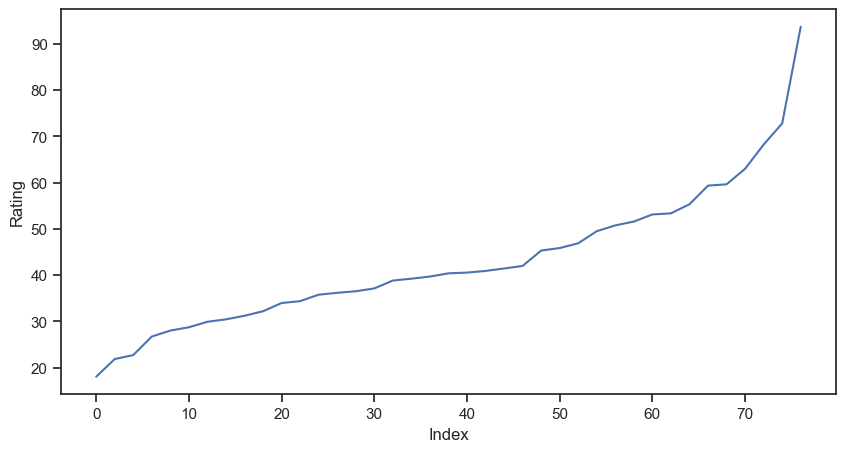

In [33]:
plt.figure(figsize=(10, 5))

# the less steps the more detailed
steps = 2
# steps = 

# the stepped dataframe jumping by n intervals
stepped_sort_temp_df = sort_temp_df[::steps]
plt.plot(stepped_sort_temp_df.rating.index, stepped_sort_temp_df.rating)

_ = plt.xlabel('Index')
_ = plt.ylabel('Rating')

# data analysis


In [34]:
df_clean = df.copy(deep=True)

In [35]:
df_clean = df_clean[df_clean['carbo'] >=0.0]
df_clean = df_clean[df_clean['sugars'] >=0.0]
df_clean = df_clean[df_clean['potass'] >=0.0]

In [36]:
df_clean['mfr'] = df_clean['mfr'].apply(lambda x: manufacturer_dict[x])

In [38]:
df_clean.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
5,Apple Cinnamon Cheerios,General Mills,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541


In [39]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [40]:
df_clean['type'] = df_clean['type'].apply(lambda x: type_dict[x])

In [41]:
df_clean.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,Nabisco,Cold,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Quaker Oats,Cold,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,Kelloggs,Cold,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kelloggs,Cold,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
5,Apple Cinnamon Cheerios,General Mills,Cold,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541


In [56]:
if(df['sugars']<=0.0).any():
    print (df['sugars'])

0      6
1      8
2      5
3      0
4      8
      ..
72     3
73    12
74     3
75     3
76     8
Name: sugars, Length: 77, dtype: int64


In [60]:
if (df_clean['sugars']<=0).any():
    print(df_clean['sugars'].count())

74


In [66]:
df_clean['potass'].count()

74

In [74]:
df_clean.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,107.027027,2.513514,1.000000,162.364865,2.175676,14.729730,7.108108,98.513514,29.054054,2.216216,1.030811,0.821622,42.371787
std,19.843893,1.075802,1.006826,82.769787,2.423391,3.891675,4.359111,70.878681,22.294352,0.832067,0.153416,0.235715,14.033712
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,135.000000,0.250000,12.000000,3.000000,41.250000,25.000000,1.250000,1.000000,0.670000,32.449210
50%,110.000000,2.500000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,1.000000,217.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.520611
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [75]:
df_clean

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,Nabisco,Cold,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Quaker Oats,Cold,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,Kelloggs,Cold,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kelloggs,Cold,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
5,Apple Cinnamon Cheerios,General Mills,Cold,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,General Mills,Cold,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,General Mills,Cold,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,Ralston Purina,Cold,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,General Mills,Cold,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [76]:
df_mfr =df_clean.copy(deep=True)

In [77]:
df_mfr =df_mfr[df_mfr['sugars']>=0]

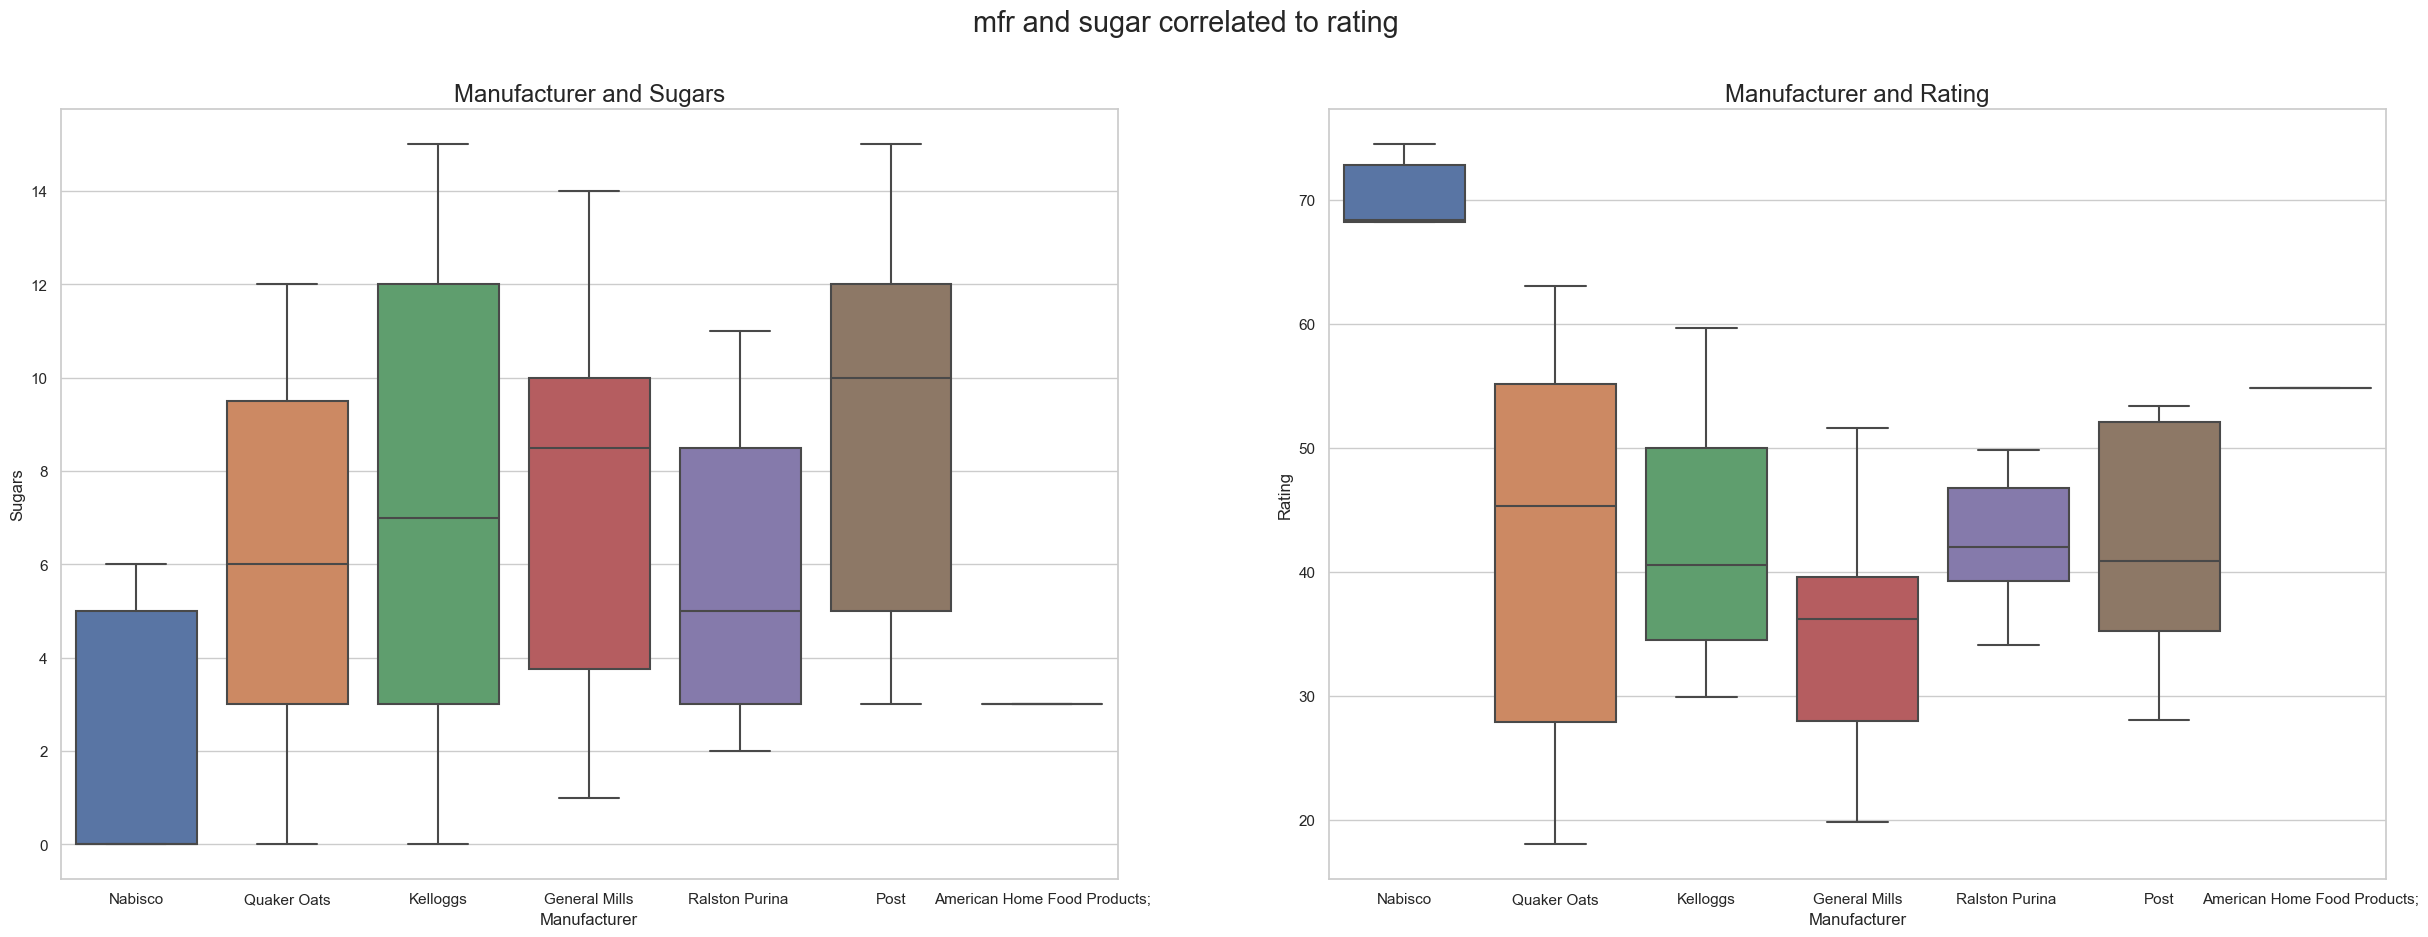

In [80]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(1,2, figsize=(30,10))
plt.suptitle('mfr and sugar correlated to rating', fontsize = 'xx-large',)
_ = sns.boxplot( data=df_mfr, x='mfr', y='sugars', ax=axes[0], showfliers=False, )
axes[0].set_title( 'Manufacturer and Sugars', fontsize='x-large', )
axes[0].set_xlabel('Manufacturer')
axes[0].set_ylabel('Sugars')


# Manufacturer and Rating
_ = sns.boxplot( data=df_mfr, x='mfr', y=TARGET_VARIABLE, ax=axes[1], showfliers=False, )
axes[1].set_title( 'Manufacturer and Rating', fontsize='x-large', )
axes[1].set_xlabel('Manufacturer')
_ = axes[1].set_ylabel('Rating')

In [85]:
df_clean.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [86]:
nutritional_columns =[
    'protein',
    'fat',
    'sodium',
    'fiber',
    'carbo',
    'sugars',
    'potass',
    'vitamins',
    'protein',
    
]

In [90]:

nutritional_columns = [
  'sugars',
  'fiber',
  'carbo',
  'sodium',
  'potass',
  'weight',
  'protein',
  'vitamins',
  'fat',
]

def nutritional_attribute_visualizer(df_subplot, index, col, ax, color_palette) -> None:
  _= sns.boxplot(
    data=df_subplot,
    x='calories',
    y=col,
    ax=ax,
     )
  ax.set_title(col.title(), fontsize='x-large')

sns.set_theme(style='white')
subplots_grid_visualizer(
  title='How other nutritional attributes relate to calories, a boxplot comparison',
  dataframe=df_clean,
  columns=nutritional_columns,
  n_cols=5,
  subplot_col_width = 10,
  subplot_col_height = 7.5,
  visualizer=nutritional_attribute_visualizer,
  subplots_adjustment={
    'top': 0.95,
    'bottom': None,
    'wspace': 0.2,
    'hspace': 0.2,
  }
)

NameError: name 'cell' is not defined

In [107]:
sum(df['weight']<0)

0

In [106]:
len(df)

77

In [108]:
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [132]:
sum((df['potass'] && df['carbo'])<0)

SyntaxError: invalid syntax (2394821402.py, line 1)

In [135]:
column1='df['potass']'
column2='df['sugars']'
for index, row in df.iterrows():
    # check if both values in the current row and columns are negative
    if row[column1] < 0 and row[column2] < 0:
        sum()
    else:
        print("At least one value in row", index, "is not negative.")

SyntaxError: invalid syntax (3476313290.py, line 1)

In [136]:
df_new = df_clean[ df_clean['carbo'] >= 0.0 ]


In [137]:
len(df_new)

74

In [139]:
df_new = df[ df['carbo'] >= 0.0 ]

In [140]:
len(df_new)

76

In [141]:
df_branew=df_new[df_new['potass']>=0.0]

In [142]:
len(df_branew)

74

In [145]:
(df_branew['sugars']<0).sum()

0

In [155]:
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [160]:
from

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2018307928.py, line 1)

In [166]:
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [32]:
correlation = df['rating'].corr(df['sugars'])

In [33]:
print('correlation:', correlation)

correlation: -0.7596746584301077


In [170]:
df_final = df.copy(deep=True)

# CLEANING THE DATASET

In [171]:
df_final=df_final.drop(columns=[
    'type',
])

In [173]:
len(df_final)

77

In [174]:
df_final=df_final[df_final['carbo'] >=0.0]
df_final=df_final[df_final['potass'] >=0.0]
df_final=df_final[df_final['sugars'] >=0.0]

In [175]:
len(df_final)

74

preprocessing our dataset

In [176]:
df_final['mfr'].unique()


array(['N', 'Q', 'K', 'G', 'R', 'P', 'A'], dtype=object)

In [178]:
df_final['mfr'] = pd.factorize(df_final['mfr'])[0]

In [179]:
df_final['name'].unique()

array(['100% Bran', '100% Natural Bran', 'All-Bran',
       'All-Bran with Extra Fiber', 'Apple Cinnamon Cheerios',
       'Apple Jacks', 'Basic 4', 'Bran Chex', 'Bran Flakes',
       "Cap'n'Crunch", 'Cheerios', 'Cinnamon Toast Crunch', 'Clusters',
       'Cocoa Puffs', 'Corn Chex', 'Corn Flakes', 'Corn Pops',
       'Count Chocula', "Cracklin' Oat Bran", 'Crispix',
       'Crispy Wheat & Raisins', 'Double Chex', 'Froot Loops',
       'Frosted Flakes', 'Frosted Mini-Wheats',
       'Fruit & Fibre Dates; Walnuts; and Oats', 'Fruitful Bran',
       'Fruity Pebbles', 'Golden Crisp', 'Golden Grahams',
       'Grape Nuts Flakes', 'Grape-Nuts', 'Great Grains Pecan',
       'Honey Graham Ohs', 'Honey Nut Cheerios', 'Honey-comb',
       'Just Right Crunchy  Nuggets', 'Just Right Fruit & Nut', 'Kix',
       'Life', 'Lucky Charms', 'Maypo',
       'Muesli Raisins; Dates; & Almonds',
       'Muesli Raisins; Peaches; & Pecans', 'Mueslix Crispy Blend',
       'Multi-Grain Cheerios', 'Nut&Honey Crun

In [180]:
pd.factorize(df_final['name'])[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73])

In [182]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler

In [183]:
scaled_dataframes = []

In [184]:
scalers = [
    ('MinMaxScaler', MinMaxScaler()),
    ('MaxAbsScaler', MaxAbsScaler()),
    ('StandardScaler', StandardScaler()),
    ('RobustScaler', RobustScaler()),
]

In [19]:
len(df)

77

In [20]:
df_cleaned = df.copy(deep=True)
df_cleaned = df_cleaned[ df_cleaned['carbo'] >= 0.0 ]
df_cleaned = df_cleaned[ df_cleaned['sugars'] >= 0.0 ]
df_cleaned = df_cleaned[ df_cleaned['potass'] >= 0.0 ]

In [21]:
len(df_cleaned)

74

In [36]:
df_cleaned.columns


Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [104]:
len(df_clean.columns)

15

# Data Normalization

In [195]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler

In [196]:
scalers = [MinMaxScaler(),MaxAbsScaler(),StandardScaler(), RobustScaler()]
normalized_dataframes = []

In [194]:
for scaler in scalers:
    nomalized_dataset=scaler.fit_transform(df)

AttributeError: 'tuple' object has no attribute 'fit_transform'

In [198]:
df_clean['mfr'].unique()

array(['Nabisco', 'Quaker Oats', 'Kelloggs', 'General Mills',
       'Ralston Purina ', 'Post', 'American Home Food Products;'],
      dtype=object)

In [199]:
df_clean['mfr']=pd.factorize(df_clean['mfr'])[0]

In [200]:
pd.factorize(df_clean['name'])[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73])

In [201]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler

In [202]:
scaled_dataframes=[]

In [307]:
scalers  = [
  ['MinMaxScaler', MinMaxScaler()],
  ['MaxAbsScaler', MaxAbsScaler()],
  ['StandardScaler', StandardScaler()],
  ['RobustScaler', RobustScaler()]
]

In [308]:
scalers

[['MinMaxScaler', MinMaxScaler()],
 ['MaxAbsScaler', MaxAbsScaler()],
 ['StandardScaler', StandardScaler()],
 ['RobustScaler', RobustScaler()]]

In [310]:
for scaler_details in scalers:
    scaler_name, scaler_model = scaler_details
    scaled_dataframes.append((
        scaler_name,
        scaler_model.fit_transform(df_clean[[col for col in df_clean.columns if col != 'name']]),
    ))


In [311]:
scaled_dataframes

[('MinMaxScaler',
  array([[0.        , 0.18181818, 0.6       , ..., 0.5       , 0.064     ,
          0.66559279],
         [0.16666667, 0.63636364, 0.4       , ..., 0.5       , 0.6       ,
          0.21068456],
         [0.33333333, 0.18181818, 0.6       , ..., 0.5       , 0.064     ,
          0.54694061],
         ...,
         [0.66666667, 0.45454545, 0.4       , ..., 0.5       , 0.336     ,
          0.41955762],
         [0.5       , 0.45454545, 0.4       , ..., 0.5       , 0.6       ,
          0.44341036],
         [0.5       , 0.54545455, 0.2       , ..., 0.5       , 0.4       ,
          0.2398125 ]])),
 ('MaxAbsScaler',
  array([[0.        , 0.4375    , 0.66666667, ..., 0.66666667, 0.22      ,
          0.72998279],
         [0.16666667, 0.75      , 0.5       , ..., 0.66666667, 0.66666667,
          0.362667  ],
         [0.33333333, 0.4375    , 0.66666667, ..., 0.66666667, 0.22      ,
          0.63417705],
         ...,
         [0.66666667, 0.625     , 0.5       , ..., 

In [327]:
for df in scaled_dataframes:
    display(df)

('MinMaxScaler',
 array([[0.        , 0.18181818, 0.6       , ..., 0.5       , 0.064     ,
         0.66559279],
        [0.16666667, 0.63636364, 0.4       , ..., 0.5       , 0.6       ,
         0.21068456],
        [0.33333333, 0.18181818, 0.6       , ..., 0.5       , 0.064     ,
         0.54694061],
        ...,
        [0.66666667, 0.45454545, 0.4       , ..., 0.5       , 0.336     ,
         0.41955762],
        [0.5       , 0.45454545, 0.4       , ..., 0.5       , 0.6       ,
         0.44341036],
        [0.5       , 0.54545455, 0.2       , ..., 0.5       , 0.4       ,
         0.2398125 ]]))

('MaxAbsScaler',
 array([[0.        , 0.4375    , 0.66666667, ..., 0.66666667, 0.22      ,
         0.72998279],
        [0.16666667, 0.75      , 0.5       , ..., 0.66666667, 0.66666667,
         0.362667  ],
        [0.33333333, 0.4375    , 0.66666667, ..., 0.66666667, 0.22      ,
         0.63417705],
        ...,
        [0.66666667, 0.625     , 0.5       , ..., 0.66666667, 0.44666667,
         0.53132161],
        [0.5       , 0.625     , 0.5       , ..., 0.66666667, 0.66666667,
         0.55058152],
        [0.5       , 0.6875    , 0.33333333, ..., 0.66666667, 0.5       ,
         0.38618636]]))

('StandardScaler',
 array([[-1.94379387, -1.87865227,  1.3911796 , ..., -0.20220332,
         -2.09989497,  1.86756537],
        [-1.21732546,  0.65821393,  0.45529514, ..., -0.20220332,
          0.76191901, -0.60179124],
        [-0.49085704, -1.87865227,  1.3911796 , ..., -0.20220332,
         -2.09989497,  1.22349144],
        ...,
        [ 0.9620798 , -0.35653255,  0.45529514, ..., -0.20220332,
         -0.64763116,  0.5320244 ],
        [ 0.23561138, -0.35653255,  0.45529514, ..., -0.20220332,
          0.76191901,  0.66150313],
        [ 0.23561138,  0.15084069, -0.48058932, ..., -0.20220332,
         -0.30592203, -0.44367744]]))

('RobustScaler',
 array([[-3.        , -4.        ,  1.5       , ...,  0.        ,
         -1.27272727,  1.55770365],
        [-2.        ,  1.        ,  0.5       , ...,  0.        ,
          0.75757576, -0.34692427],
        [-1.        , -4.        ,  1.5       , ...,  0.        ,
         -1.27272727,  1.06092599],
        ...,
        [ 1.        , -1.        ,  0.5       , ...,  0.        ,
         -0.24242424,  0.52759378],
        [ 0.        , -1.        ,  0.5       , ...,  0.        ,
          0.75757576,  0.62746141],
        [ 0.        ,  0.        , -0.5       , ...,  0.        ,
          0.        , -0.22497025]]))

(array([[-3.        , -4.        ,  1.5       , ...,  0.        ,
         -1.27272727,  1.55770365],
        [-2.        ,  1.        ,  0.5       , ...,  0.        ,
          0.75757576, -0.34692427],
        [-1.        , -4.        ,  1.5       , ...,  0.        ,
         -1.27272727,  1.06092599],
        ...,
        [ 1.        , -1.        ,  0.5       , ...,  0.        ,
         -0.24242424,  0.52759378],
        [ 0.        , -1.        ,  0.5       , ...,  0.        ,
          0.75757576,  0.62746141],
        [ 0.        ,  0.        , -0.5       , ...,  0.        ,
          0.        , -0.22497025]]),)

(array([[-3.        , -4.        ,  1.5       , ...,  0.        ,
         -1.27272727,  1.55770365],
        [-2.        ,  1.        ,  0.5       , ...,  0.        ,
          0.75757576, -0.34692427],
        [-1.        , -4.        ,  1.5       , ...,  0.        ,
         -1.27272727,  1.06092599],
        ...,
        [ 1.        , -1.        ,  0.5       , ...,  0.        ,
         -0.24242424,  0.52759378],
        [ 0.        , -1.        ,  0.5       , ...,  0.        ,
          0.75757576,  0.62746141],
        [ 0.        ,  0.        , -0.5       , ...,  0.        ,
          0.        , -0.22497025]]),)

(array([[-3.        , -4.        ,  1.5       , ...,  0.        ,
         -1.27272727,  1.55770365],
        [-2.        ,  1.        ,  0.5       , ...,  0.        ,
          0.75757576, -0.34692427],
        [-1.        , -4.        ,  1.5       , ...,  0.        ,
         -1.27272727,  1.06092599],
        ...,
        [ 1.        , -1.        ,  0.5       , ...,  0.        ,
         -0.24242424,  0.52759378],
        [ 0.        , -1.        ,  0.5       , ...,  0.        ,
          0.75757576,  0.62746141],
        [ 0.        ,  0.        , -0.5       , ...,  0.        ,
          0.        , -0.22497025]]),)

(array([[-3.        , -4.        ,  1.5       , ...,  0.        ,
         -1.27272727,  1.55770365],
        [-2.        ,  1.        ,  0.5       , ...,  0.        ,
          0.75757576, -0.34692427],
        [-1.        , -4.        ,  1.5       , ...,  0.        ,
         -1.27272727,  1.06092599],
        ...,
        [ 1.        , -1.        ,  0.5       , ...,  0.        ,
         -0.24242424,  0.52759378],
        [ 0.        , -1.        ,  0.5       , ...,  0.        ,
          0.75757576,  0.62746141],
        [ 0.        ,  0.        , -0.5       , ...,  0.        ,
          0.        , -0.22497025]]),)

(array([[-3.        , -4.        ,  1.5       , ...,  0.        ,
         -1.27272727,  1.55770365],
        [-2.        ,  1.        ,  0.5       , ...,  0.        ,
          0.75757576, -0.34692427],
        [-1.        , -4.        ,  1.5       , ...,  0.        ,
         -1.27272727,  1.06092599],
        ...,
        [ 1.        , -1.        ,  0.5       , ...,  0.        ,
         -0.24242424,  0.52759378],
        [ 0.        , -1.        ,  0.5       , ...,  0.        ,
          0.75757576,  0.62746141],
        [ 0.        ,  0.        , -0.5       , ...,  0.        ,
          0.        , -0.22497025]]),)

(array([[-3.        , -4.        ,  1.5       , ...,  0.        ,
         -1.27272727,  1.55770365],
        [-2.        ,  1.        ,  0.5       , ...,  0.        ,
          0.75757576, -0.34692427],
        [-1.        , -4.        ,  1.5       , ...,  0.        ,
         -1.27272727,  1.06092599],
        ...,
        [ 1.        , -1.        ,  0.5       , ...,  0.        ,
         -0.24242424,  0.52759378],
        [ 0.        , -1.        ,  0.5       , ...,  0.        ,
          0.75757576,  0.62746141],
        [ 0.        ,  0.        , -0.5       , ...,  0.        ,
          0.        , -0.22497025]]),)

(array([[-3.        , -4.        ,  1.5       , ...,  0.        ,
         -1.27272727,  1.55770365],
        [-2.        ,  1.        ,  0.5       , ...,  0.        ,
          0.75757576, -0.34692427],
        [-1.        , -4.        ,  1.5       , ...,  0.        ,
         -1.27272727,  1.06092599],
        ...,
        [ 1.        , -1.        ,  0.5       , ...,  0.        ,
         -0.24242424,  0.52759378],
        [ 0.        , -1.        ,  0.5       , ...,  0.        ,
          0.75757576,  0.62746141],
        [ 0.        ,  0.        , -0.5       , ...,  0.        ,
          0.        , -0.22497025]]),)

(array([[-3.        , -4.        ,  1.5       , ...,  0.        ,
         -1.27272727,  1.55770365],
        [-2.        ,  1.        ,  0.5       , ...,  0.        ,
          0.75757576, -0.34692427],
        [-1.        , -4.        ,  1.5       , ...,  0.        ,
         -1.27272727,  1.06092599],
        ...,
        [ 1.        , -1.        ,  0.5       , ...,  0.        ,
         -0.24242424,  0.52759378],
        [ 0.        , -1.        ,  0.5       , ...,  0.        ,
          0.75757576,  0.62746141],
        [ 0.        ,  0.        , -0.5       , ...,  0.        ,
          0.        , -0.22497025]]),)

('MinMaxScaler',
 array([[0.        , 0.18181818, 0.6       , ..., 0.5       , 0.064     ,
         0.66559279],
        [0.16666667, 0.63636364, 0.4       , ..., 0.5       , 0.6       ,
         0.21068456],
        [0.33333333, 0.18181818, 0.6       , ..., 0.5       , 0.064     ,
         0.54694061],
        ...,
        [0.66666667, 0.45454545, 0.4       , ..., 0.5       , 0.336     ,
         0.41955762],
        [0.5       , 0.45454545, 0.4       , ..., 0.5       , 0.6       ,
         0.44341036],
        [0.5       , 0.54545455, 0.2       , ..., 0.5       , 0.4       ,
         0.2398125 ]]))

('MaxAbsScaler',
 array([[0.        , 0.4375    , 0.66666667, ..., 0.66666667, 0.22      ,
         0.72998279],
        [0.16666667, 0.75      , 0.5       , ..., 0.66666667, 0.66666667,
         0.362667  ],
        [0.33333333, 0.4375    , 0.66666667, ..., 0.66666667, 0.22      ,
         0.63417705],
        ...,
        [0.66666667, 0.625     , 0.5       , ..., 0.66666667, 0.44666667,
         0.53132161],
        [0.5       , 0.625     , 0.5       , ..., 0.66666667, 0.66666667,
         0.55058152],
        [0.5       , 0.6875    , 0.33333333, ..., 0.66666667, 0.5       ,
         0.38618636]]))

('StandardScaler',
 array([[-1.94379387, -1.87865227,  1.3911796 , ..., -0.20220332,
         -2.09989497,  1.86756537],
        [-1.21732546,  0.65821393,  0.45529514, ..., -0.20220332,
          0.76191901, -0.60179124],
        [-0.49085704, -1.87865227,  1.3911796 , ..., -0.20220332,
         -2.09989497,  1.22349144],
        ...,
        [ 0.9620798 , -0.35653255,  0.45529514, ..., -0.20220332,
         -0.64763116,  0.5320244 ],
        [ 0.23561138, -0.35653255,  0.45529514, ..., -0.20220332,
          0.76191901,  0.66150313],
        [ 0.23561138,  0.15084069, -0.48058932, ..., -0.20220332,
         -0.30592203, -0.44367744]]))

('RobustScaler',
 array([[-3.        , -4.        ,  1.5       , ...,  0.        ,
         -1.27272727,  1.55770365],
        [-2.        ,  1.        ,  0.5       , ...,  0.        ,
          0.75757576, -0.34692427],
        [-1.        , -4.        ,  1.5       , ...,  0.        ,
         -1.27272727,  1.06092599],
        ...,
        [ 1.        , -1.        ,  0.5       , ...,  0.        ,
         -0.24242424,  0.52759378],
        [ 0.        , -1.        ,  0.5       , ...,  0.        ,
          0.75757576,  0.62746141],
        [ 0.        ,  0.        , -0.5       , ...,  0.        ,
          0.        , -0.22497025]]))

('MinMaxScaler',
 array([[0.        , 0.18181818, 0.6       , ..., 0.5       , 0.064     ,
         0.66559279],
        [0.16666667, 0.63636364, 0.4       , ..., 0.5       , 0.6       ,
         0.21068456],
        [0.33333333, 0.18181818, 0.6       , ..., 0.5       , 0.064     ,
         0.54694061],
        ...,
        [0.66666667, 0.45454545, 0.4       , ..., 0.5       , 0.336     ,
         0.41955762],
        [0.5       , 0.45454545, 0.4       , ..., 0.5       , 0.6       ,
         0.44341036],
        [0.5       , 0.54545455, 0.2       , ..., 0.5       , 0.4       ,
         0.2398125 ]]))

('MaxAbsScaler',
 array([[0.        , 0.4375    , 0.66666667, ..., 0.66666667, 0.22      ,
         0.72998279],
        [0.16666667, 0.75      , 0.5       , ..., 0.66666667, 0.66666667,
         0.362667  ],
        [0.33333333, 0.4375    , 0.66666667, ..., 0.66666667, 0.22      ,
         0.63417705],
        ...,
        [0.66666667, 0.625     , 0.5       , ..., 0.66666667, 0.44666667,
         0.53132161],
        [0.5       , 0.625     , 0.5       , ..., 0.66666667, 0.66666667,
         0.55058152],
        [0.5       , 0.6875    , 0.33333333, ..., 0.66666667, 0.5       ,
         0.38618636]]))

('StandardScaler',
 array([[-1.94379387, -1.87865227,  1.3911796 , ..., -0.20220332,
         -2.09989497,  1.86756537],
        [-1.21732546,  0.65821393,  0.45529514, ..., -0.20220332,
          0.76191901, -0.60179124],
        [-0.49085704, -1.87865227,  1.3911796 , ..., -0.20220332,
         -2.09989497,  1.22349144],
        ...,
        [ 0.9620798 , -0.35653255,  0.45529514, ..., -0.20220332,
         -0.64763116,  0.5320244 ],
        [ 0.23561138, -0.35653255,  0.45529514, ..., -0.20220332,
          0.76191901,  0.66150313],
        [ 0.23561138,  0.15084069, -0.48058932, ..., -0.20220332,
         -0.30592203, -0.44367744]]))

('RobustScaler',
 array([[-3.        , -4.        ,  1.5       , ...,  0.        ,
         -1.27272727,  1.55770365],
        [-2.        ,  1.        ,  0.5       , ...,  0.        ,
          0.75757576, -0.34692427],
        [-1.        , -4.        ,  1.5       , ...,  0.        ,
         -1.27272727,  1.06092599],
        ...,
        [ 1.        , -1.        ,  0.5       , ...,  0.        ,
         -0.24242424,  0.52759378],
        [ 0.        , -1.        ,  0.5       , ...,  0.        ,
          0.75757576,  0.62746141],
        [ 0.        ,  0.        , -0.5       , ...,  0.        ,
          0.        , -0.22497025]]))

In [329]:
minmax_scaled_df = scaled_dataframes[0]
standard_scaled_df = scaled_dataframes[1]
maxabs_scaled_df = scaled_dataframes[2]
robust_scaled_df = scaled_dataframes[3]

In [330]:
minmax_scaled_df


('MinMaxScaler',
 array([[0.        , 0.18181818, 0.6       , ..., 0.5       , 0.064     ,
         0.66559279],
        [0.16666667, 0.63636364, 0.4       , ..., 0.5       , 0.6       ,
         0.21068456],
        [0.33333333, 0.18181818, 0.6       , ..., 0.5       , 0.064     ,
         0.54694061],
        ...,
        [0.66666667, 0.45454545, 0.4       , ..., 0.5       , 0.336     ,
         0.41955762],
        [0.5       , 0.45454545, 0.4       , ..., 0.5       , 0.6       ,
         0.44341036],
        [0.5       , 0.54545455, 0.2       , ..., 0.5       , 0.4       ,
         0.2398125 ]]))

In [331]:
MinMax=minmax_scaled_df[1]
StandardScaler = standard_scaled_df[1]
MaxAbsScaler = maxabs_scaled_df[1]
RobustScaler = robust_scaled_df[1]

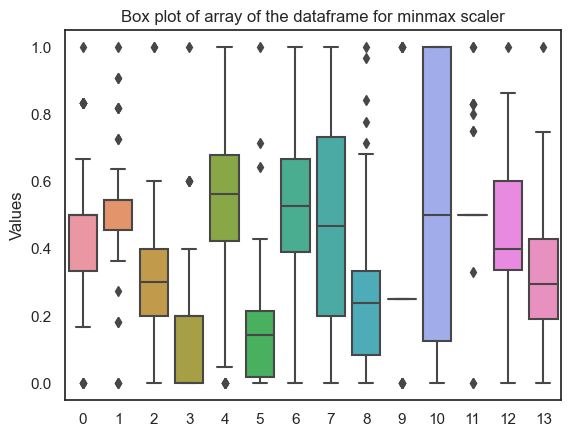

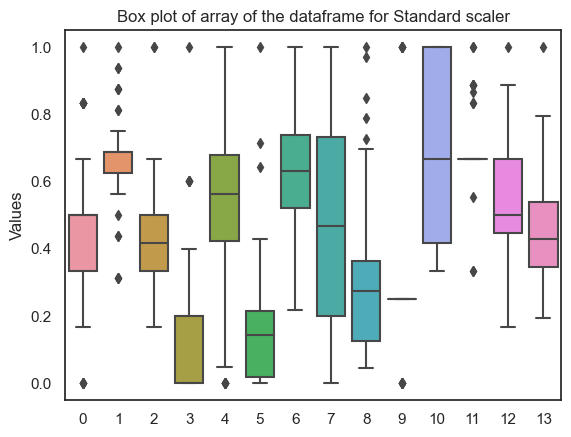

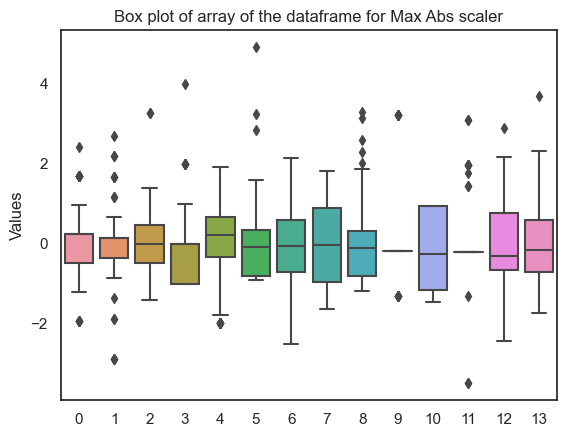

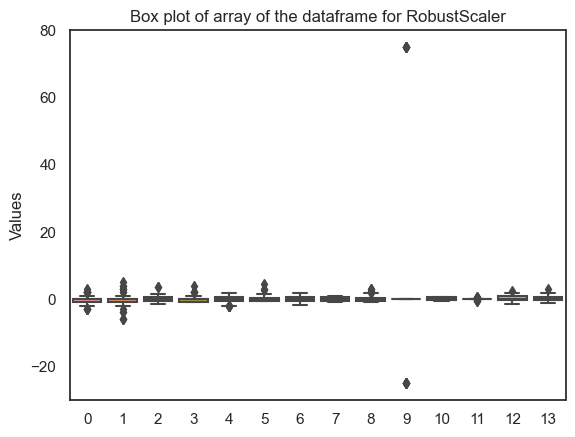

In [332]:
ax = sns.boxplot(data=MinMax)

ax.set_ylabel('Values')
ax.set_title('Box plot of array of the dataframe for minmax scaler')

# show the plot
plt.show()

ax = sns.boxplot(data=StandardScaler)

ax.set_ylabel('Values')
ax.set_title('Box plot of array of the dataframe for Standard scaler')

# show the plot
plt.show()

ax = sns.boxplot(data=MaxAbsScaler)

ax.set_ylabel('Values')
ax.set_title('Box plot of array of the dataframe for Max Abs scaler')

# show the plot
plt.show()

ax = sns.boxplot(data=RobustScaler)

ax.set_ylabel('Values')
ax.set_title('Box plot of array of the dataframe for RobustScaler')

# show the plot
plt.show()